In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(1)

In [58]:
#Based on US Census
regionList = ["New England", "Middle Atlantic", "East North Central", "West North Central", "South Atlantic", "East South Central", "West South Central", "Mountain", "Pacific"]
weekdayList = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def Sea_Prob(region):
    #Winter, Spring, Summer, Fall
    if region == "New England" or region == "Middle Atlantic" or region == "East North Central":
        return [0.1, 0.25, 0.5, 0.15]
    elif region == "Pacific" or region == "Mountain" or region == "West North Central":
        return [0.125, 0.2, 0.5, 0.175]
    elif region == "East South Central" or region == "West South Central" or region == "South Atlantic":
        return [0.1, 0.3, 0.4, 0.2]
    
def Sess_Len(season):
    if season == "Winter":
        return round(abs(np.random.normal(1,1)),0)
    elif season == "Spring":
        return round(abs(np.random.normal(2,2)),0)
    elif season == "Summer":
        return round(abs(np.random.normal(4,2)),0)
    elif season == "Fall":
        return round(abs(np.random.normal(2,1.5)),0)
    
def Sess_Day(season):
    #Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
    if season == "Winter" or season == "Summer":
        return [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
    elif season == "Spring" or season == "Fall":
        return [0.1, 0.1, 0.1, 0.1, 0.2, 0.25, 0.15]
    
def Clamp(value, minVal, maxVal):
    if value < (maxVal - minVal) / 2:
        return minVal
    else:
        return maxVal
    
def Skew_Value(mean, deviation, power, dilution, direction):
    realPower = direction * (1 + power)
    zScore = (np.random.normal(mean, deviation) - mean) / deviation
    return skewValue
    

In [59]:
dataSetSize = 1000

#Independent Variables
prdDict = {
    "Region": np.random.choice(regionList, dataSetSize),
    "Season": [],
    "Session Length": [],
    "Session Days": [],
    "Sibling Discount": [],
    "Military Discount": [],
    "Membership Discount": [],
    "Membership Required": [],
    "Min Age": [],
    "Max Age": [],
    "Price": [],
    "Max Capacity": [],
    "Registration Total": [],
    "Registration Ratio": []
}

#Dependent Variables
for index in range(dataSetSize):
    prdDict["Season"].append(np.random.choice(["Winter", "Spring", "Summer", "Fall"], p=Sea_Prob(prdDict["Region"][index])))
    prdDict["Session Length"].append(Sess_Len(prdDict["Season"][index]))
    prdDict["Session Days"].append(np.random.choice(weekdayList, p=Sess_Day(prdDict["Season"][index])))
    prdDict["Sibling Discount"].append(Clamp(np.random.normal(0.17, 0.37), 0, 1))
    prdDict["Military Discount"].append(Clamp(np.random.normal(0.27, 0.44), 0, 1))
    prdDict["Membership Discount"].append(Clamp(np.random.normal(0.08, 0.27), 0, 1))
    prdDict["Membership Required"].append(Clamp(np.random.normal(0.17, 0.38), 0, 1))
    prdDict["Min Age"].append(round(abs(np.random.normal(7.96, 2.39)) / (1 + np.random.normal(0.07, 0.02)))) #Skew strength [power, dilution], skew direction [*,/]
    prdDict["Max Age"].append(round(Skew_Value(7.96, 2.39, 0.07, 0.02)))


prdFrame = pd.DataFrame(prdDict)

                 Region  Season  Session Length Session Days  \
0    East South Central  Winter             0.0    Wednesday   
1               Pacific  Summer             3.0       Sunday   
2    East South Central  Winter             0.0     Saturday   
3           New England  Summer             4.0      Tuesday   
4           New England  Spring             2.0       Monday   
..                  ...     ...             ...          ...   
995  East North Central  Summer             3.0       Sunday   
996             Pacific  Winter             1.0       Sunday   
997  West North Central  Spring             4.0     Saturday   
998  West South Central  Winter             2.0       Monday   
999            Mountain  Summer             3.0      Tuesday   

     Sibling Discount  Military Discount  Membership Discount  \
0                   1                  0                    0   
1                   0                  0                    0   
2                   0               

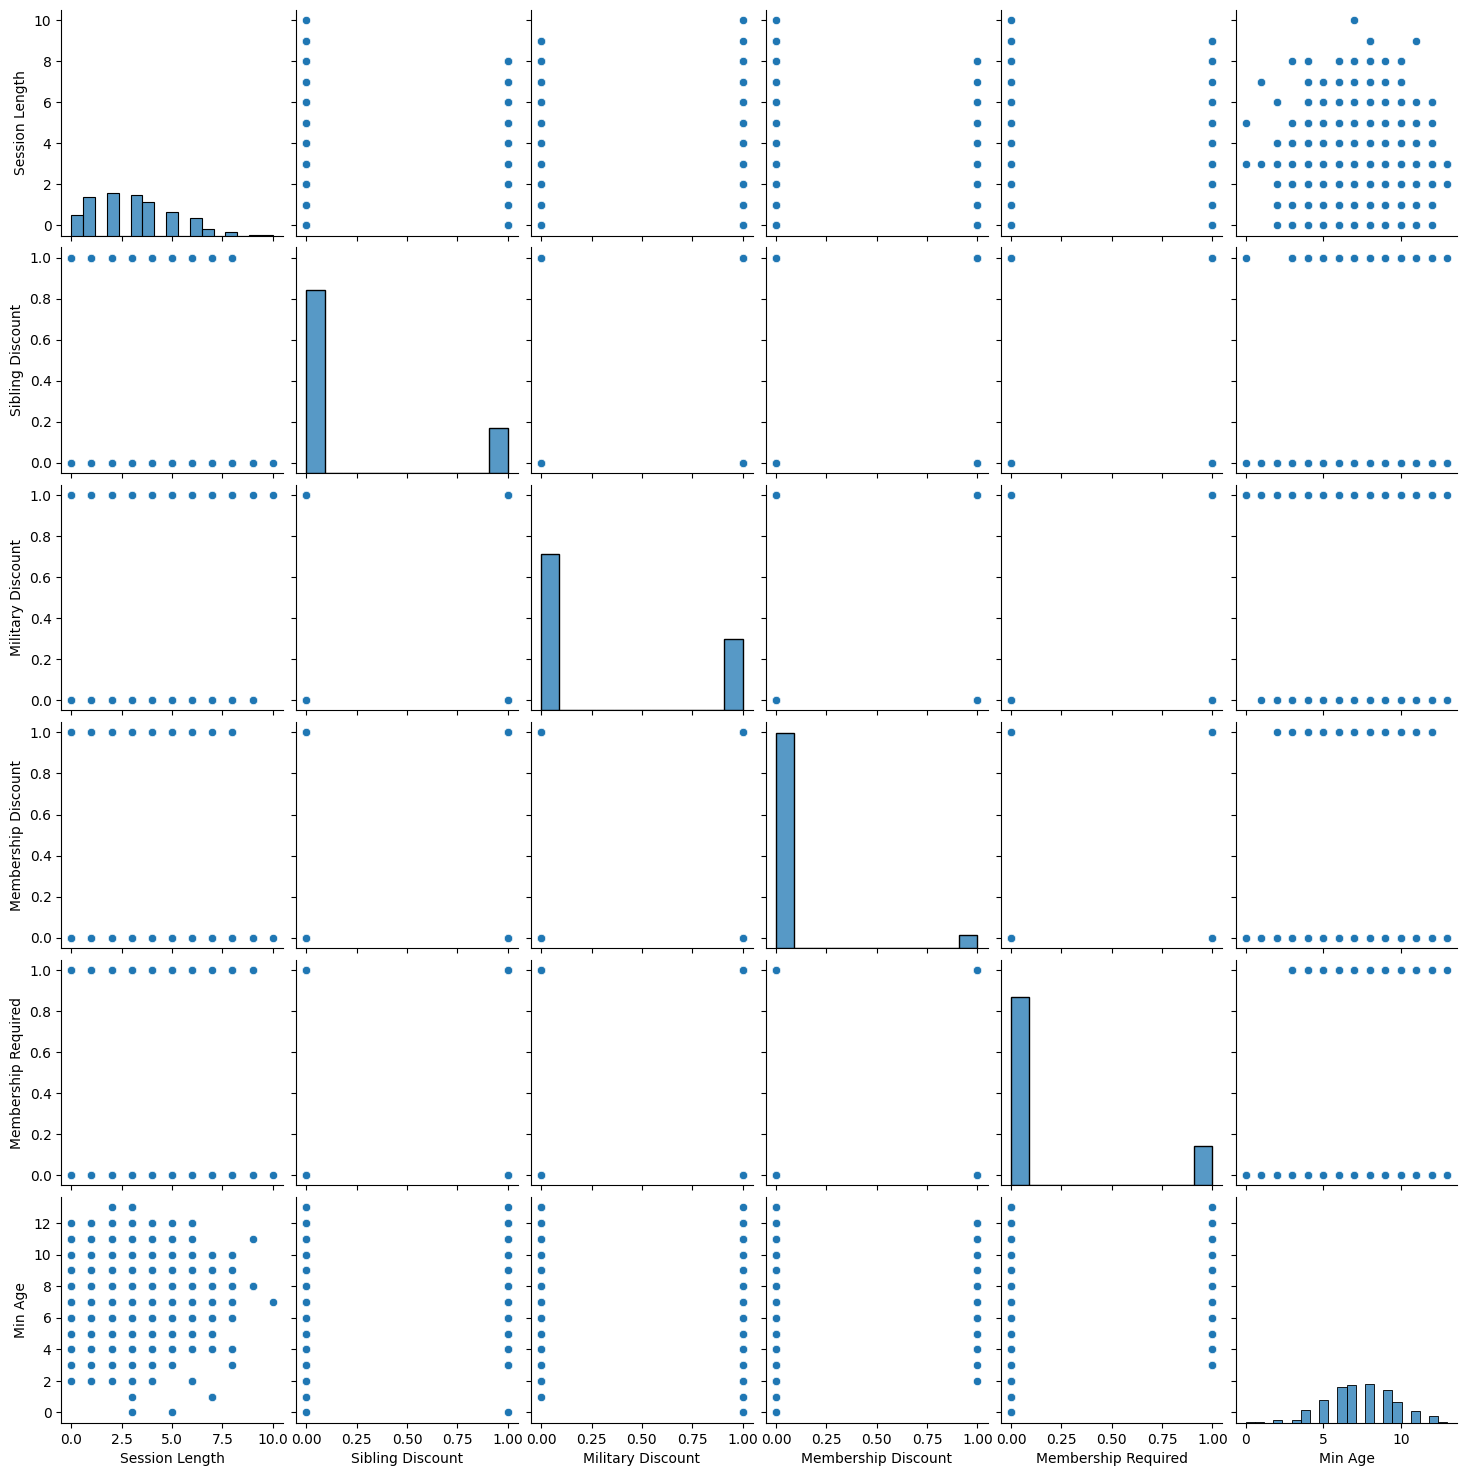

In [60]:
print(prdFrame)

sns.pairplot(data=prdFrame)